# Amazon Review Data Exploration

https://s3.amazonaws.com/amazon-reviews-pds/tsv/index.txt

SAMPLE CONTENT:
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_us.tsv
https://s3.amazonaws.com/amazon-reviews-pds/tsv/sample_fr.tsv

|DATA COLUMNS:| Description |
|-------------|--------|
|marketplace       | 2 letter country code of the marketplace where the review was written. |
|customer_id       | Random identifier that can be used to aggregate reviews written by a single author. |
|review_id         | The unique ID of the review. |
|product_id        | The unique Product ID the review pertains to. In the multilingual dataset the reviews                    for the same product in different countries can be grouped by the same product_id. |
|product_parent    | Random identifier that can be used to aggregate reviews for the same product. |
|product_title     | Title of the product. |
|product_category  | Broad product category that can be used to group reviews (also used to group the dataset into coherent parts). |
|star_rating       | The 1-5 star rating of the review. |
|helpful_votes     | Number of helpful votes. |
|total_votes       | Number of total votes the review received. |
|vine              | Review was written as part of the Vine program. |
|verified_purchase | The review is on a verified purchase. |
|review_headline   | The title of the review. |
|review_body       | The review text. |
|review_date       | The date the review was written. |

DATA FORMAT
Tab ('\t') separated text file, without quote or escape characters.
First line in each file is header; 1 line corresponds to 1 record.


In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# global variables
COLUMNS_TO_DROP=["marketplace", "vine", "verified_purchase"]
USE_PANDAS=True


# file with mixed lines where some pandas will grab multiple lines but not others
DATA_FILE="dataset/amazon_reviews/amazon_reviews_us_Wireless_v1_00-error.tsv"



# Read using pandas

## This doesn't seem to be working if you look down later for analysis for wc from headlines - lines that are saying that there are 22 columns it's not reading new lines properly even though I checked in vi and they have the right number of columns

In [3]:

if USE_PANDAS == True:

    # pandas is doing something weird. The lines that says have bad number of columns actually have the right columns???
    reviews = pd.read_csv(DATA_FILE, sep="\t", 
                             parse_dates=["review_date"], 
                             warn_bad_lines=True, 
                             error_bad_lines=False)
    reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
marketplace          27 non-null object
customer_id          27 non-null int64
review_id            27 non-null object
product_id           27 non-null object
product_parent       27 non-null int64
product_title        27 non-null object
product_category     27 non-null object
star_rating          27 non-null int64
helpful_votes        27 non-null int64
total_votes          27 non-null int64
vine                 27 non-null object
verified_purchase    27 non-null object
review_headline      27 non-null object
review_body          26 non-null object
review_date          27 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 3.2+ KB


# Try reading line by line and see if this will be better

In [4]:
# not quite ready
if USE_PANDAS == False:

    columns = ["marketplace", "customer_id", "review_id", "product_id",
              "product_parent", "product_title", "product_category", 
              "star_rating", "helpful_votes", "total_votes", "vine",
              "verified_purchase", "review_headline", "review_body",
              "review_date"]
    reviews = pd.DataFrame(columns = columns)
    count = 0
    with open(DATA_FILE, "r") as file:
        for line in file:
            if len(line) > 0:
                line = line.rstrip("\n")
                # skip the header
                if count > 0:
                    splitted = line.split("\t")
#                     print(splitted)
                    reviews = reviews.append(pd.Series(splitted, index=columns), 
                                   ignore_index=True)
                count += 1
                if count % 10000 == 0:
                    print(f"processed {count}")
#                 if count == 3:
#                     break

    print(len(reviews))

    
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
marketplace          27 non-null object
customer_id          27 non-null int64
review_id            27 non-null object
product_id           27 non-null object
product_parent       27 non-null int64
product_title        27 non-null object
product_category     27 non-null object
star_rating          27 non-null int64
helpful_votes        27 non-null int64
total_votes          27 non-null int64
vine                 27 non-null object
verified_purchase    27 non-null object
review_headline      27 non-null object
review_body          26 non-null object
review_date          27 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 3.2+ KB


In [5]:
# set datatypes for the columns
if USE_PANDAS == False:
    reviews = reviews.astype({
        "review_date": np.datetime64,
        "star_rating": np.int64,
        "helpful_votes": np.int64,
        "total_votes": np.int64
    })
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
marketplace          27 non-null object
customer_id          27 non-null int64
review_id            27 non-null object
product_id           27 non-null object
product_parent       27 non-null int64
product_title        27 non-null object
product_category     27 non-null object
star_rating          27 non-null int64
helpful_votes        27 non-null int64
total_votes          27 non-null int64
vine                 27 non-null object
verified_purchase    27 non-null object
review_headline      27 non-null object
review_body          26 non-null object
review_date          27 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(9)
memory usage: 3.2+ KB


In [6]:
# looks like sometimes we have reviews with no body, no headline, and no review dates
# let's drop those rows with missing data
# also drop the following columns since they will always be the same
clean_df = reviews.dropna().drop(COLUMNS_TO_DROP, axis = 1)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 26
Data columns (total 12 columns):
customer_id         26 non-null int64
review_id           26 non-null object
product_id          26 non-null object
product_parent      26 non-null int64
product_title       26 non-null object
product_category    26 non-null object
star_rating         26 non-null int64
helpful_votes       26 non-null int64
total_votes         26 non-null int64
review_headline     26 non-null object
review_body         26 non-null object
review_date         26 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 2.6+ KB


# Review Stars Distribution

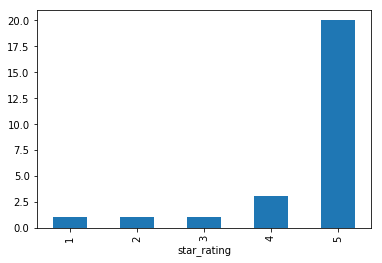

In [7]:
# let's look at distribution of stars
clean_df.groupby("star_rating").size().plot(kind='bar')
# reviews lean heavily towards 5-stars

In [8]:
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.total_votes > 0)]) / len(clean_df), 2)* 100} percent "\
      f"({len(clean_df[(clean_df.total_votes > 0)])}) has votes")
# let's look at what percentage of reviews have votes
print(f"{round(len(clean_df[(clean_df.helpful_votes > 0)]) / len(clean_df), 2)* 100} percent "\
            f"({len(clean_df[(clean_df.helpful_votes > 0)])}) has helpful votes")


# let's look at distribution of total_votes
clean_df.describe()
# looks like most do not have any votes

19.0 percent (5) has votes
19.0 percent (5) has helpful votes


,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,2.600000e+01,2.600000e+01,26.000000,26.000000,26.000000
mean,2.486540e+07,4.186121e+08,4.538462,0.346154,0.346154
std,1.695008e+07,3.223169e+08,1.028816,0.797110,0.797110
min,1.005773e+06,2.163301e+07,1.000000,0.000000,0.000000
25%,1.178610e+07,8.713150e+07,5.000000,0.000000,0.000000
50%,2.214886e+07,4.598929e+08,5.000000,0.000000,0.000000
75%,3.801677e+07,7.232669e+08,5.000000,0.000000,0.000000
max,5.288620e+07,9.867828e+08,5.000000,3.000000,3.000000


# Review Headlines

Looks like the most frequent number of words in headline is 2

50% have 2700 words or less in headlines

count    10.000000
mean      2.600000
std       3.747592
min       1.000000
25%       1.000000
50%       1.000000
75%       2.500000
max      13.000000
dtype: float64


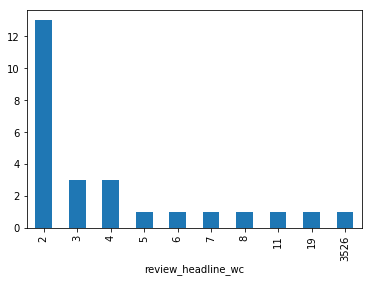

In [9]:
# let's look at wordcount for headlines
df = clean_df
# this doesn't work
# df = df.apply(review_headline_wc=lambda x: len(x["review_headline"].str.split()))
# this doesn't work either - seems to be applying split across all headlines
# df["review_headline_wc"] = df["review_headline"].str.split().count()


df["review_headline_wc"] = df["review_headline"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_headline_wc")
print(grouped.size().describe())

grouped.size().plot(kind='bar')

In [10]:
grouped.size()

review_headline_wc
2       13
3        3
4        3
5        1
6        1
7        1
8        1
11       1
19       1
3526     1
dtype: int64

## Interesting.. If you use Pandas, the ones with largest wc grabbed multiple rows

In [11]:
df = clean_df
for index, row in df[(df["review_headline_wc"] == df.review_headline_wc.max())].head(1).iterrows():
    print(f'{index} headline: [{row["review_headline"]}]')
    print(f'{index} body: [{row["review_body"]}]')
clean_df.info()

1 headline: [5-Star Rating – Was very easy to put on my new Galaxy	&#34;5-Star Rating – Was very easy to put on my new Galaxy. I mis-aligned the screen protector slightly but it was easy to lift it and correct the alignment. No bubbles or other problems.&#34;	2015-07-27
US	26952783	R3O4ERCN3DTXQO	B00SWQV4JA	646700147	MOONCASE Premium PU Leather Slim Flip Bracket Window Case Cover for HTC One M7 Red	Wireless	5	0	0	N	Y	Five Stars	Fast shipping, look nicer than the image, fits well to my HTC M7.	2015-07-27
US	2275966	R3LHVUEFR2AGAE	B00IX5YOG0	963886012	S5 HSERIES CASES, BUDDIBOX	Wireless	5	0	0	N	Y	Five Stars	Great protection I can compare to the OtterBox I definitely purchase from this company again	2015-07-27
US	430034	R2L43OCW0MIK11	B00LXL6ZKO	129044147	Samsung Galaxy S3 S III Mini Original OEM Battery - Non-Retail Packaging - Black (Discontinued by Manufacturer)	Wireless	5	0	0	N	Y	Five Stars	good	2015-07-27
US	45572467	R2TA0FMHIV7E7N	B00ESOMFRA	966614270	iLLumiShield – Samsung Convoy 3

# Review Body

In [12]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

df.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,review_headline_wc,review_body_wc
0,19333916,R1AQ5D1SFH1UCW,B00JH882JW,878254697,Spigen Liquid Air iPhone 6 Case with Durable F...,Wireless,5,0,0,I like the clear look,"Got the clear case - soft case, fits very well...",2015-07-27,5,30
1,27593825,R21U7PJCM98QQF,B00SYA3FTQ,104756313,Samsung Galaxy S5 Glass Screen Protector by Vo...,Wireless,5,0,0,5-Star Rating – Was very easy to put on my new...,Love it. My daughter loves it too. She has a D...,2015-07-27,3526,32
2,22684872,RIPG13XN1OEJY,B00MJ81PYQ,469359817,"Galaxy Centura Case, CellJoy® [Future Armor] S...",Wireless,4,0,0,Four Stars,"as listed, no screen protector",2015-07-27,2,5
3,5975621,R13XJO03RAH9PP,B00YHUGZ1W,81256566,QualityStores® LG Logos Case / LG Escape2 Case...,Wireless,5,0,0,Five Stars,"Really great quality got such a low price, bea...",2015-07-27,2,15
4,50684753,RKUM9T6ZN2G9M,B00DI67RTK,474566116,Wallets iPhone 4,Wireless,5,0,0,Iphone 4 case,"Nice, small wallet type phone carrier",2015-07-27,3,6


In [13]:
max_wc = df.review_body_wc.max()
min_wc = df.review_body_wc.min()
print(f"min review wc: {min_wc} max review wc: {max_wc}")

min review wc: 1 max review wc: 226


## we need to strip reviews with 0 wc

In [14]:
# min review wc
for index, row in df[(df["review_body_wc"] == df.review_body_wc.min())].head(1).iterrows():
    print(f'{index} headline: [{row["review_headline"]}]')
    print(f'{index} body: [{row["review_body"]}]')


11 headline: [Five Stars]
11 body: [[perfect]


In [15]:
for index, row in df[(df["review_body_wc"] == df.review_body_wc.max())].head(1).iterrows():
    print(f'{index} headline: [{row["review_headline"]}]')
    print(f'{index} body: [{row["review_body"]}]')


17 headline: [Good backup power bank for high capacity devices.]
17 body: [The URPOWER 12,000mAh portable power bank specifications are well described in the sales promo and need no repetition. When tested it showed some qualities and a few flaws.<br /><br />PROS:<br />Portable - in a purse, backpack, attache etc.<br />LED indicator of residual power.<br />Auto shutdown - if overload, short circuit or user error.<br />Fast charging @5V/1.5A input.<br />Generous power capacity - enough to feed multiple mobile devices simultaneously.<br />Ideal for today’s high capacity mobile devices.<br /><br />Two USB ports - USB1:5V/1.0A ; USB2: 5V/2.4A.<br />Charges most USB compatible devices.<br />Auto shutdown when finished charging - power saver.<br /><br />CONS:<br />Relatively bulky and heavy. Cumbersome in a coat pocket.<br />Lacking expected certifications - ROHS and UL.<br />Has only CE stamp - which means that it conforms with European Standards.<br />Auto shutdown when ipad and tablet cha

## interesting find. We need to strip HTML newlines from the text
## also need to strip numeric characters from reviews


Looks like most 50% of reviews have 6 words or less

At 75% percentile we start seeing reviews with 6+ words

In [16]:
df = clean_df

# now let's look at distribution of wc for review body
df["review_body_wc"] = df["review_body"].apply(lambda x: len(x.split()))

grouped = df.groupby("review_body_wc")
print(grouped.size().describe())

count    20.000000
mean      1.300000
std       0.571241
min       1.000000
25%       1.000000
50%       1.000000
75%       1.250000
max       3.000000
dtype: float64


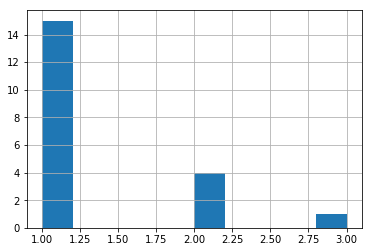

In [17]:
df.groupby("review_body_wc").size().hist()

In [18]:
# let's plot by quantile

quantile_list = [0, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.]
quantiles = df["review_body_wc"].quantile(quantile_list)

print(quantiles)

df = df.assign(review_body_quantile=lambda x: pd.cut(x["review_body_wc"], quantiles.array))
df.head(5)

0.0      1.0
0.1      1.5
0.2      5.0
0.3     10.0
0.4     12.0
0.5     15.0
0.6     23.0
0.7     27.0
0.8     32.0
0.9     57.5
1.0    226.0
Name: review_body_wc, dtype: float64


,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,review_headline_wc,review_body_wc,review_body_quantile
0,19333916,R1AQ5D1SFH1UCW,B00JH882JW,878254697,Spigen Liquid Air iPhone 6 Case with Durable F...,Wireless,5,0,0,I like the clear look,"Got the clear case - soft case, fits very well...",2015-07-27,5,30,"(27.0, 32.0]"
1,27593825,R21U7PJCM98QQF,B00SYA3FTQ,104756313,Samsung Galaxy S5 Glass Screen Protector by Vo...,Wireless,5,0,0,5-Star Rating – Was very easy to put on my new...,Love it. My daughter loves it too. She has a D...,2015-07-27,3526,32,"(27.0, 32.0]"
2,22684872,RIPG13XN1OEJY,B00MJ81PYQ,469359817,"Galaxy Centura Case, CellJoy® [Future Armor] S...",Wireless,4,0,0,Four Stars,"as listed, no screen protector",2015-07-27,2,5,"(1.5, 5.0]"
3,5975621,R13XJO03RAH9PP,B00YHUGZ1W,81256566,QualityStores® LG Logos Case / LG Escape2 Case...,Wireless,5,0,0,Five Stars,"Really great quality got such a low price, bea...",2015-07-27,2,15,"(12.0, 15.0]"
4,50684753,RKUM9T6ZN2G9M,B00DI67RTK,474566116,Wallets iPhone 4,Wireless,5,0,0,Iphone 4 case,"Nice, small wallet type phone carrier",2015-07-27,3,6,"(5.0, 10.0]"


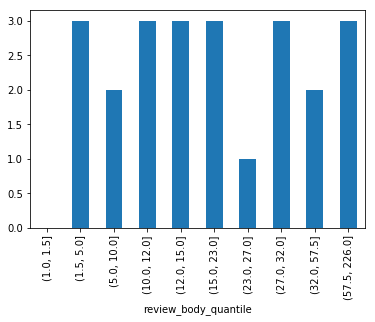

In [19]:
df.groupby("review_body_quantile").size().plot(kind='bar')

In [20]:
# let's try fixed binning - 10 fixed bins
max_wc = df.review_body_wc.max()


fixed_bin = df.assign(review_body_fixed_bin=lambda x: pd.cut(x["review_body_wc"], 
                       np.arange(0, max_wc, round(max_wc/10,0))))
fixed_bin.head(5)

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,review_headline,review_body,review_date,review_headline_wc,review_body_wc,review_body_quantile,review_body_fixed_bin
0,19333916,R1AQ5D1SFH1UCW,B00JH882JW,878254697,Spigen Liquid Air iPhone 6 Case with Durable F...,Wireless,5,0,0,I like the clear look,"Got the clear case - soft case, fits very well...",2015-07-27,5,30,"(27.0, 32.0]","(23.0, 46.0]"
1,27593825,R21U7PJCM98QQF,B00SYA3FTQ,104756313,Samsung Galaxy S5 Glass Screen Protector by Vo...,Wireless,5,0,0,5-Star Rating – Was very easy to put on my new...,Love it. My daughter loves it too. She has a D...,2015-07-27,3526,32,"(27.0, 32.0]","(23.0, 46.0]"
2,22684872,RIPG13XN1OEJY,B00MJ81PYQ,469359817,"Galaxy Centura Case, CellJoy® [Future Armor] S...",Wireless,4,0,0,Four Stars,"as listed, no screen protector",2015-07-27,2,5,"(1.5, 5.0]","(0.0, 23.0]"
3,5975621,R13XJO03RAH9PP,B00YHUGZ1W,81256566,QualityStores® LG Logos Case / LG Escape2 Case...,Wireless,5,0,0,Five Stars,"Really great quality got such a low price, bea...",2015-07-27,2,15,"(12.0, 15.0]","(0.0, 23.0]"
4,50684753,RKUM9T6ZN2G9M,B00DI67RTK,474566116,Wallets iPhone 4,Wireless,5,0,0,Iphone 4 case,"Nice, small wallet type phone carrier",2015-07-27,3,6,"(5.0, 10.0]","(0.0, 23.0]"


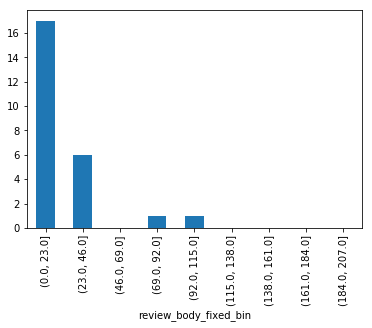

In [21]:
fixed_bin.groupby("review_body_fixed_bin").size().plot(kind='bar')

# Conslusion

looks like Yelp reviews tends to be more verbose than Amazon

90% of Amazon reviews have ~80 words or less compared to yelp reviews which is around ~55%

## Update - 4/25 - Pandas is having issues reading the lines correctly for Amazon reviews so I think some of this data is incorrect

